## 几种常见的规则网络的生成与可视化

In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

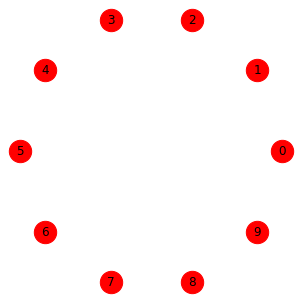

In [4]:
n=10
# 创建孤立节点图
G1 = nx.Graph()
G1.add_nodes_from(list(range(n)))
plt.figure(figsize=(4,4))
nx.draw(G1, pos=nx.circular_layout(G1), node_size=500, node_color="red", with_labels=True)
plt.savefig("./image/孤立图.pdf")

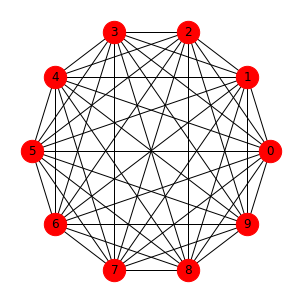

In [6]:
# 创建完全图
G2 = nx.complete_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G2, pos=nx.circular_layout(G2), node_size=500, node_color="red", with_labels=True)
plt.savefig("./image/完全图.pdf")

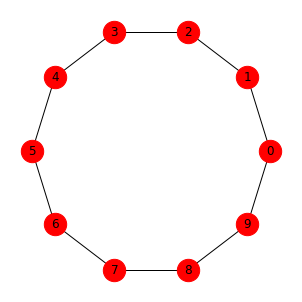

In [9]:
# 创建一维环状图
G3 = nx.cycle_graph(n)
plt.figure(figsize=(4,4))
nx.draw(G3, pos=nx.circular_layout(G3), node_size=500, node_color="red", with_labels=True)
plt.savefig("环状图.pdf")

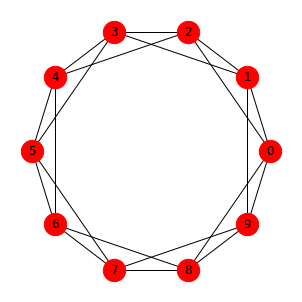

In [25]:
# K近邻规则(耦合)图
# 利用小世界网络来生成
G4 = nx.watts_strogatz_graph(n, 4, 0)# 第三个param表示每条边重构的概率
plt.figure(figsize=(4,4))
nx.draw(G4, pos=nx.circular_layout(G4), node_size=500, node_color="red", with_labels=True)
plt.savefig("./image/K近邻规则图.pdf")

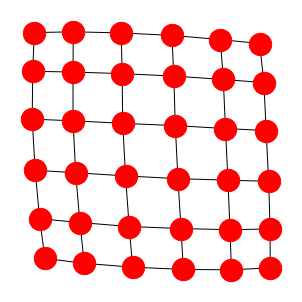

In [33]:
# 二维方格图
G5 = nx.grid_graph((6,6), periodic=False)# 第三个param表示每条边重构的概率
plt.figure(figsize=(4,4))
nx.draw(G5, node_size=500, node_color="red", with_labels=False)
plt.savefig("./image/二维方格图.pdf")

## ER随机网络的生成算法

### G(N, L)算法

In [84]:
def GNL(N, L):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    nlist = list(G)
    edge_count = 0
    while edge_count<L:
        n = random.choice(nlist)
        v = random.choice(nlist)
        if n==v or G.has_edge(n, v):
            continue
        else:
            G.add_edge(n, v)
            edge_count+=1
    return G

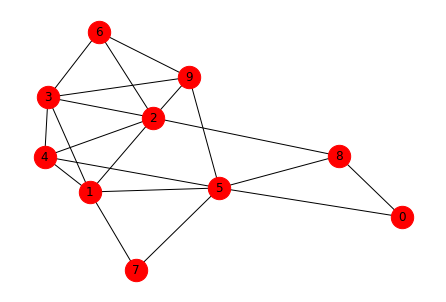

In [86]:
G = GNL(10, 20)
nx.draw(G, node_size=500, node_color="red", with_labels=True)

### G(N, p)算法

In [49]:
# 嵌套循环实现
def GNP(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i+1, N):
            if random.random()<p:
                G.add_edge(i, j)
    return G

In [80]:
# 使用itertools工具类实现
def GNP(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    edges = itertools.combinations(range(N), 2)
    for edge in edges:
        if random.random()<p:
            G.add_edge(*edge)
    return G

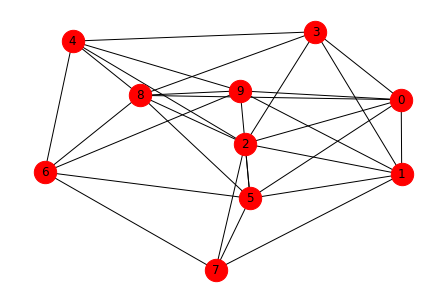

In [87]:
G = GNP(10, 0.5)
nx.draw(G, node_size=500, node_color="red", with_labels=True)

### 直接使用networkx的库函数

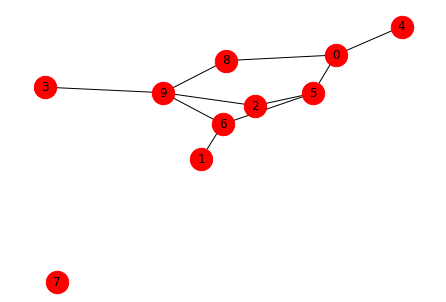

In [90]:
G = nx.gnm_random_graph(10,10)
nx.draw(G, node_size=500, node_color="red", with_labels=True)

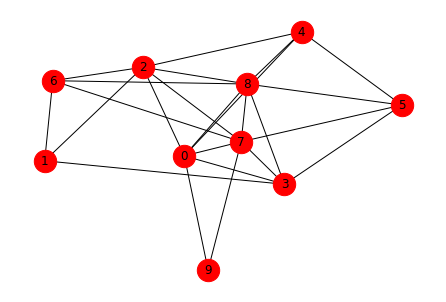

In [91]:
G = nx.gnp_random_graph(10, 0.7)
nx.draw(G, node_size=500, node_color="red", with_labels=True)

Text(0.5, 1.0, 'G(N, p)')

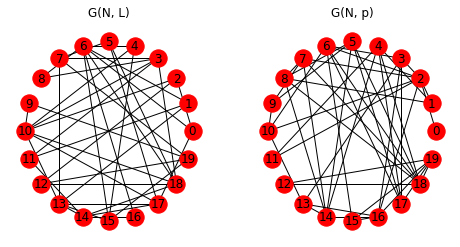

In [92]:
n, m, p = 20, 40, 0.2
g1 = nx.gnm_random_graph(n, m)
g2 = nx.gnp_random_graph(n, p)

plt.figure(figsize=(8, 4))

plt.subplot(121)
nx.draw(g1, pos=nx.circular_layout(g1), node_size=300, node_color="red", with_labels=True)
plt.title("G(N, L)")

plt.subplot(122)
nx.draw(g2, pos=nx.circular_layout(g2), node_size=300, node_color="red", with_labels=True)
plt.title("G(N, p)")